In [36]:
import numpy as np
from matplotlib import pyplot as plt
from openpiv import tools as piv_tls

In [37]:
import piv_filters.filters.spatial_filters as piv_pre

In [38]:
img_path = r'D:\PIV\Images\PIV_Challenge_2014F\TIFF\F_00001.tif'
img = piv_tls.imread(img_path)
img.shape
img_raw = img.copy() # plotting purposes

In [39]:
# normalize image to [0..1] for preprocessing
img_max = img.max()
img_min = img.min()
img = img.astype("float32") # 32 bit float to conserve space
img = (img - img_min) / (img_max - img_min) # [0..1]

In [40]:
# normalize pixel intensities by variance
img = piv_pre.variance_normalization_filter(img, 3, 2, 1, True) # kernel size = 3, clip negative pixel intensities

In [41]:
# set pixels greater than threshold to 1, else 0
img = piv_pre.threshold_binarization(img, 0.5)

In [42]:
# gaussian blur the binarized pixels
img = piv_pre.gaussian_filter(img, 3, 1) #kernel size = 3, sigma = 1

In [43]:
# scale image back to normal bit depth (or 8 bit uint8 for the OpenPivGui)
img *= img_max

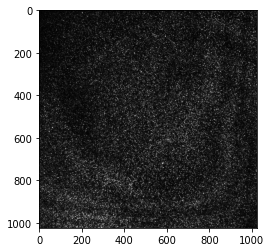

In [44]:
plt.imshow(img_raw, cmap = "gray", vmin = img_min, vmax = img_max)

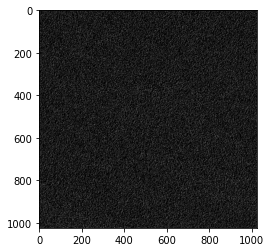

In [45]:
plt.imshow(img, cmap = "gray", vmin = img_min, vmax = img_max)